<a href="https://colab.research.google.com/github/endii17/Python_Cohort_Analysis/blob/main/Project_Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Bản sao của HomeTest 1 - KPMG Data.xlsx to Bản sao của HomeTest 1 - KPMG Data.xlsx


In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [78]:
df= pd.read_excel('Bản sao của HomeTest 1 - KPMG Data.xlsx')
df.head(5)


,customer_id,transaction_id,transaction_date,online_order,order_status,product_id,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,2950,1,2017-02-25,0.0,Approved,2,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,3120,2,2017-05-21,1.0,Approved,3,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,402,3,2017-10-16,0.0,Approved,37,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,3135,4,2017-08-31,0.0,Approved,88,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,787,5,2017-10-01,1.0,Approved,78,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [79]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              20000 non-null  int64         
 1   transaction_id           20000 non-null  int64         
 2   transaction_date         20000 non-null  datetime64[ns]
 3   online_order             19640 non-null  float64       
 4   order_status             20000 non-null  object        
 5   product_id               20000 non-null  int64         
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

### 1. Cleaning data

In [80]:
df = df[df['order_status'] == 'Approved']


In [81]:
df.drop_duplicates(inplace=True)

In [82]:
df = df.drop(['online_order', 'brand', 'product_line', 'product_class', 'product_size', 'standard_cost'], axis=1)

In [83]:
df['product_first_sold_date'] = df[['product_first_sold_date']].fillna(df['product_first_sold_date'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19821 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              19821 non-null  int64         
 1   transaction_id           19821 non-null  int64         
 2   transaction_date         19821 non-null  datetime64[ns]
 3   order_status             19821 non-null  object        
 4   product_id               19821 non-null  int64         
 5   list_price               19821 non-null  float64       
 6   product_first_sold_date  19821 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 1.2+ MB


## 2. Assign the cohort

In [84]:
# Get month-year from transaction_date
df['year_month'] = df['transaction_date'].dt.to_period('M')

In [85]:
df.head(5)

,customer_id,transaction_id,transaction_date,order_status,product_id,list_price,product_first_sold_date,year_month
0,2950,1,2017-02-25,Approved,2,71.49,41245.0,2017-02
1,3120,2,2017-05-21,Approved,3,2091.47,41701.0,2017-05
2,402,3,2017-10-16,Approved,37,1793.43,36361.0,2017-10
3,3135,4,2017-08-31,Approved,88,1198.46,36145.0,2017-08
4,787,5,2017-10-01,Approved,78,1765.30,42226.0,2017-10


In [86]:
# find start month (Cohort Month) of each customer
df['Cohort Month'] = df.groupby('customer_id').year_month.transform(np.min)

<ipython-input-86-c1d9063a9fda>:2: FutureWarning: The provided callable <function min at 0x79823620b520> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df['Cohort Month'] = df.groupby('customer_id').year_month.transform(np.min)


In [87]:
# Caculate Cohort Index
df['Cohort Index'] = df['year_month'].astype(int) - df['Cohort Month'].astype(int) + 1

In [90]:
df = df.sort_values(['customer_id','Cohort Month','Cohort Index'])

,customer_id,transaction_id,transaction_date,order_status,product_id,list_price,product_first_sold_date,year_month,Cohort Month,Cohort Index
9784,1,9785,2017-01-05,Approved,72,360.40,37873.0,2017-01,2017-01,1
13423,1,13424,2017-02-21,Approved,2,71.49,38573.0,2017-02,2017-01,2
14485,1,14486,2017-03-27,Approved,23,688.63,33455.0,2017-03,2017-01,3
18969,1,18970,2017-03-29,Approved,11,1274.93,35378.0,2017-03,2017-01,3
3764,1,3765,2017-04-06,Approved,38,1577.53,39526.0,2017-04,2017-01,4
...,...,...,...,...,...,...,...,...,...,...
2462,3500,2463,2017-04-25,Approved,2,71.49,41245.0,2017-04,2017-01,4
8561,3500,8562,2017-08-08,Approved,33,1311.44,33888.0,2017-08,2017-01,8
16700,5034,16701,2017-01-27,Approved,0,360.40,35667.0,2017-01,2017-01,1
17468,5034,17469,2017-01-03,Approved,0,742.54,33879.0,2017-01,2017-01,1


In [94]:
# Assign the cohort: count distinct customer_id group by 'Cohort Month' and 'Cohort Index'
df_cohort = df.groupby(['Cohort Month','Cohort Index']).agg(customer_count=('customer_id','nunique')
                                                     ).sort_values(['Cohort Month','Cohort Index']).reset_index()

df_cohort

,Cohort Month,Cohort Index,customer_count
0,2017-01,1,1347
1,2017-01,2,483
2,2017-01,3,505
3,2017-01,4,499
4,2017-01,5,492
...,...,...,...
73,2017-10,2,6
74,2017-10,3,8
75,2017-11,1,13
76,2017-11,2,5


In [98]:
# pivot cohort table
df_cohort_pivot = df_cohort.pivot(index='Cohort Month',
                      columns ='Cohort Index',
                      values = 'customer_count')
df_cohort_pivot

Cohort Index,1,2,3,4,5,6,7,8,9,10,11,12
Cohort Month,,,,,,,,,,,,
2017-01,1347.0,483.0,505.0,499.0,492.0,475.0,513.0,524.0,489.0,524.0,492.0,510.0
2017-02,800.0,322.0,297.0,311.0,283.0,297.0,306.0,281.0,325.0,306.0,292.0,NaN
2017-03,484.0,167.0,172.0,164.0,180.0,184.0,173.0,209.0,186.0,180.0,NaN,NaN
2017-04,337.0,110.0,121.0,152.0,142.0,118.0,144.0,125.0,129.0,NaN,NaN,NaN
2017-05,213.0,86.0,83.0,88.0,73.0,73.0,74.0,83.0,NaN,NaN,NaN,NaN
2017-06,123.0,45.0,44.0,47.0,45.0,45.0,54.0,NaN,NaN,NaN,NaN,NaN
2017-07,77.0,26.0,26.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,51.0,18.0,22.0,18.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,24.0,8.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Caculate retiontion rate

In [105]:
# Caculate retention rate: cohort dataframe devided by the first column (first month)
first_month = df_cohort_pivot[df_cohort_pivot.columns[0]]
retention_rate = df_cohort_pivot.divide(first_month, axis=0)
retention_rate = retention_rate.round(3)*100
retention_rate

Cohort Index,1,2,3,4,5,6,7,8,9,10,11,12
Cohort Month,,,,,,,,,,,,
2017-01,100.0,35.9,37.5,37.0,36.5,35.3,38.1,38.9,36.3,38.9,36.5,37.9
2017-02,100.0,40.2,37.1,38.9,35.4,37.1,38.2,35.1,40.6,38.2,36.5,NaN
2017-03,100.0,34.5,35.5,33.9,37.2,38.0,35.7,43.2,38.4,37.2,NaN,NaN
2017-04,100.0,32.6,35.9,45.1,42.1,35.0,42.7,37.1,38.3,NaN,NaN,NaN
2017-05,100.0,40.4,39.0,41.3,34.3,34.3,34.7,39.0,NaN,NaN,NaN,NaN
2017-06,100.0,36.6,35.8,38.2,36.6,36.6,43.9,NaN,NaN,NaN,NaN,NaN
2017-07,100.0,33.8,33.8,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,35.3,43.1,35.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,33.3,29.2,37.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Visualize with heatmap


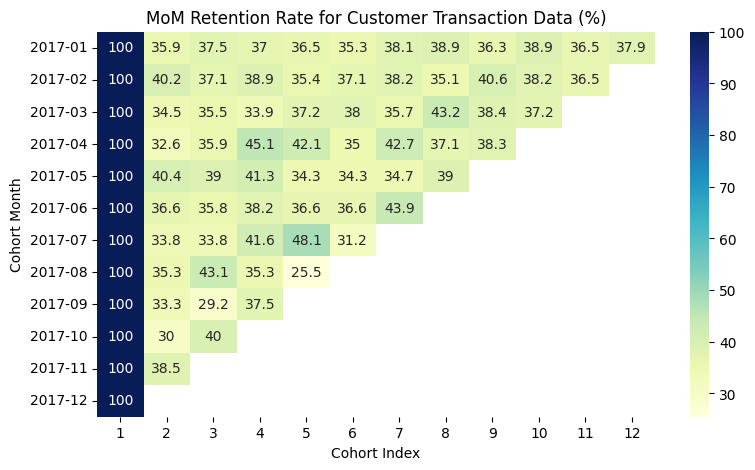

In [109]:
# Set heatmap size
plt.figure(figsize = (9,5))

# Create heatmap
sns.heatmap(retention_rate, annot = True, cmap="YlGnBu", fmt='g')
plt.title('MoM Retention Rate for Customer Transaction Data (%)')
plt.yticks(rotation = 'horizontal')

plt.show()

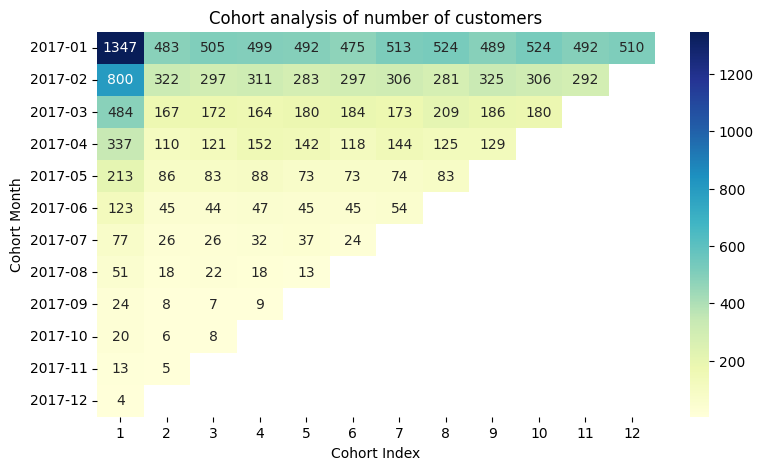

In [108]:
# Set heatmap size
plt.figure(figsize = (9,5))

# Create heatmap
sns.heatmap(df_cohort_pivot, annot = True, cmap="YlGnBu", fmt='g')
plt.title('Cohort analysis of number of customers')
plt.yticks(rotation = 'horizontal')

plt.show()

### 5. Insights and recommendations

#### Insights
- In general, the retention rate at KPMG is quite stable, mostly maintained in the range of 31% to 45%. However, the number of customers who made the first purchase decreased sharply over the months, from 1347 customers (Jan 2017) to 4 customers (Dec 2017)
- Customers who placed their first order between April and July 2017 tend to have higher retention rates than the other groups: 48.1% in the fifth month of July 2017, 45.1% in the fourth month of April 2017.
- Retention rates of customers purchasing their first products in January, February, and March 2017 were relatively stable (about 33% to 43%). Meanwhile, these rates in August, September, and October 2017 are more fluctuating, especially in August: 43.1% in the 3rd month but 25.5% in the 5th month.

#### Recommendations
- KPMG did a good job of maintaining stable retention rates over the user's lifetime, but the number of customers who made the first purchase declines over time => We need to gather more information about the context in the past (promotions, seasonal trends, product quality changes, etc.) to analyze the cause and evaluate the effectiveness of marketing campaigns
- The mid-year months (Apr - Jul) have higher retention rates than other groups => focus on finding out the characteristics of these groups to design special offers or new marketing campaigns for other months of the year.